In [ ]:
# Install kaggle API
!pip install -q kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

# Create a kaggle directory and move kaggle.json there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

# Unzip the dataset
!unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

# Splitting the dataset


Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

In [ ]:
file_path = "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the base directory
base_dir = "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

# Define the classes
classes = ['Cyst', 'Normal', 'Stone', 'Tumor']

# Define the directories for training and testing
train_dir = '/content/training'
test_dir = '/content/testing'

# Create the directories for training and testing data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split data
def split_data(source, train, test, split_ratio=0.75):
    for cls in classes:
        os.makedirs(os.path.join(train, cls), exist_ok=True)
        os.makedirs(os.path.join(test, cls), exist_ok=True)
        source_dir = os.path.join(source, cls)

        # List all files in the source directory
        files = os.listdir(source_dir)

        # Split the files into train and test sets
        train_files, test_files = train_test_split(files, train_size=split_ratio, random_state=42)

        # Move the files to respective train and test directories
        for file in train_files:
            shutil.copy(os.path.join(source_dir, file), os.path.join(train, cls, file))

        for file in test_files:
            shutil.copy(os.path.join(source_dir, file), os.path.join(test, cls, file))

# Split the dataset
split_data(base_dir, train_dir, test_dir, split_ratio=0.75)

print("Dataset split into training and testing sets successfully.")


Dataset split into training and testing sets successfully.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_path = "training"
test_path = "testing"

In [ ]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

train_set = GetDatasetSize(train_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",test_set)

{'Tumor': 1712, 'Normal': 3807, 'Cyst': 2781, 'Stone': 1032} 

 {'Tumor': 571, 'Normal': 1270, 'Cyst': 928, 'Stone': 345}


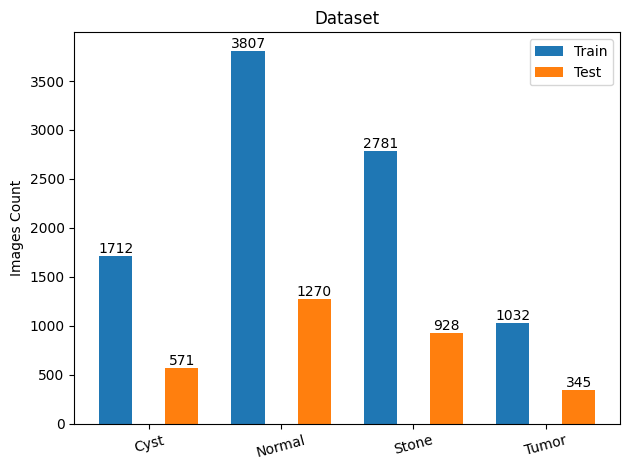

In [ ]:
labels = ['Cyst', 'Normal', 'Stone', 'Tumor']

train_list = list(train_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects3 = ax.bar(x + width, test_list, width, label='Test')

ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()
ax.bar_label(rects1)
ax.bar_label(rects3)

fig.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

train_data.class_indices

Found 9332 images belonging to 4 classes.


{'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_data = train_datagen.flow_from_directory(
    train_path,
    batch_size=5,
    target_size=(350, 350),
    class_mode='categorical'
)

print(train_data.class_indices)

Found 9332 images belonging to 4 classes.
{'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')
test_data.class_indices

Found 3114 images belonging to 4 classes.


{'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}

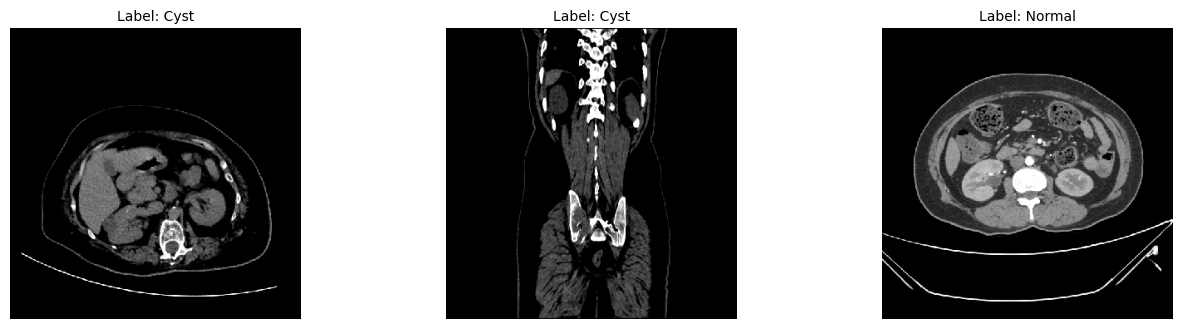

In [ ]:
def plot_sample_images(images, labels, class_indices):
    class_labels = list(class_indices.keys())
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    fig.subplots_adjust(wspace=0.5)

    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title("Label: {}".format(class_labels[np.argmax(labels[i])]), fontsize=10)  # Adjust fontsize as needed
        axs[i].axis('off')

    plt.show()

sample_images, sample_labels = next(train_data)
plot_sample_images(sample_images[:3], sample_labels[:3], train_data.class_indices)

In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(350,350,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
NUM_CLASSES = 4

vgg_model = Sequential()

vgg_model.add(base_model)

vgg_model.add(layers.Flatten())

vgg_model.add(layers.Dropout(0.25))

vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
mc = ModelCheckpoint(
    filepath="./Kidney.hdf5",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [ mc];

In [ ]:
vgg = vgg_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=32,
    callbacks=call_back
)


Epoch 1/32
1866/1866 [==============================] - ETA: 0s - loss: 0.3036 - accuracy: 0.9253

1866/1866 [==============================] - 157s 78ms/step - loss: 0.3036 - accuracy: 0.9253
Epoch 2/32
1866/1866 [==============================] - ETA: 0s - loss: 0.1750 - accuracy: 0.9709

1866/1866 [==============================] - 145s 78ms/step - loss: 0.1750 - accuracy: 0.9709
Epoch 3/32
1866/1866 [==============================] - ETA: 0s - loss: 0.1199 - accuracy: 0.9825

1866/1866 [==============================] - 145s 78ms/step - loss: 0.1199 - accuracy: 0.9825
Epoch 4/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9888

1866/1866 [==============================] - 146s 78ms/step - loss: 0.0717 - accuracy: 0.9888
Epoch 5/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0600 - accuracy: 0.9910

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0600 - accuracy: 0.9910
Epoch 6/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9937

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0634 - accuracy: 0.9937
Epoch 7/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0950 - accuracy: 0.9904

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0950 - accuracy: 0.9904
Epoch 8/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9937

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0513 - accuracy: 0.9937
Epoch 9/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9980

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0174 - accuracy: 0.9980
Epoch 10/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9938

1866/1866 [==============================] - 146s 78ms/step - loss: 0.0567 - accuracy: 0.9938
Epoch 11/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9992

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0067 - accuracy: 0.9992
Epoch 12/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9947

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0504 - accuracy: 0.9947
Epoch 13/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9961

1866/1866 [==============================] - 146s 78ms/step - loss: 0.0398 - accuracy: 0.9961
Epoch 14/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9973

1866/1866 [==============================] - 146s 78ms/step - loss: 0.0389 - accuracy: 0.9973
Epoch 15/32
1866/1866 [==============================] - ETA: 0s - loss: 3.4175e-06 - accuracy: 1.0000

1866/1866 [==============================] - 146s 78ms/step - loss: 3.4175e-06 - accuracy: 1.0000
Epoch 16/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9962

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0316 - accuracy: 0.9962
Epoch 17/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9958

1866/1866 [==============================] - 146s 78ms/step - loss: 0.0457 - accuracy: 0.9958
Epoch 18/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9975

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0276 - accuracy: 0.9975
Epoch 19/32
1866/1866 [==============================] - ETA: 0s - loss: 1.2885e-07 - accuracy: 1.0000

1866/1866 [==============================] - 145s 78ms/step - loss: 1.2885e-07 - accuracy: 1.0000
Epoch 20/32
1866/1866 [==============================] - ETA: 0s - loss: 1.5870e-06 - accuracy: 1.0000

1866/1866 [==============================] - 145s 78ms/step - loss: 1.5870e-06 - accuracy: 1.0000
Epoch 21/32
1866/1866 [==============================] - ETA: 0s - loss: 2.8982e-07 - accuracy: 1.0000

1866/1866 [==============================] - 145s 78ms/step - loss: 2.8982e-07 - accuracy: 1.0000
Epoch 22/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9972

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0351 - accuracy: 0.9972
Epoch 23/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9958

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0630 - accuracy: 0.9958
Epoch 24/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9998

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0022 - accuracy: 0.9998
Epoch 25/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9975

1866/1866 [==============================] - 144s 77ms/step - loss: 0.0506 - accuracy: 0.9975
Epoch 26/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9992

1866/1866 [==============================] - 146s 78ms/step - loss: 0.0107 - accuracy: 0.9992
Epoch 27/32
1866/1866 [==============================] - ETA: 0s - loss: 1.8747e-06 - accuracy: 1.0000

1866/1866 [==============================] - 145s 78ms/step - loss: 1.8747e-06 - accuracy: 1.0000
Epoch 28/32
1866/1866 [==============================] - ETA: 0s - loss: 1.4826e-09 - accuracy: 1.0000

1866/1866 [==============================] - 145s 78ms/step - loss: 1.4826e-09 - accuracy: 1.0000
Epoch 29/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9969

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0336 - accuracy: 0.9969
Epoch 30/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9973

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0281 - accuracy: 0.9973
Epoch 31/32
1866/1866 [==============================] - ETA: 0s - loss: 5.8323e-08 - accuracy: 1.0000

1866/1866 [==============================] - 145s 78ms/step - loss: 5.8323e-08 - accuracy: 1.0000
Epoch 32/32
1866/1866 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9985

1866/1866 [==============================] - 145s 78ms/step - loss: 0.0295 - accuracy: 0.9985


In [ ]:
vgg_model.save('Kidney_tumor.hdf5')